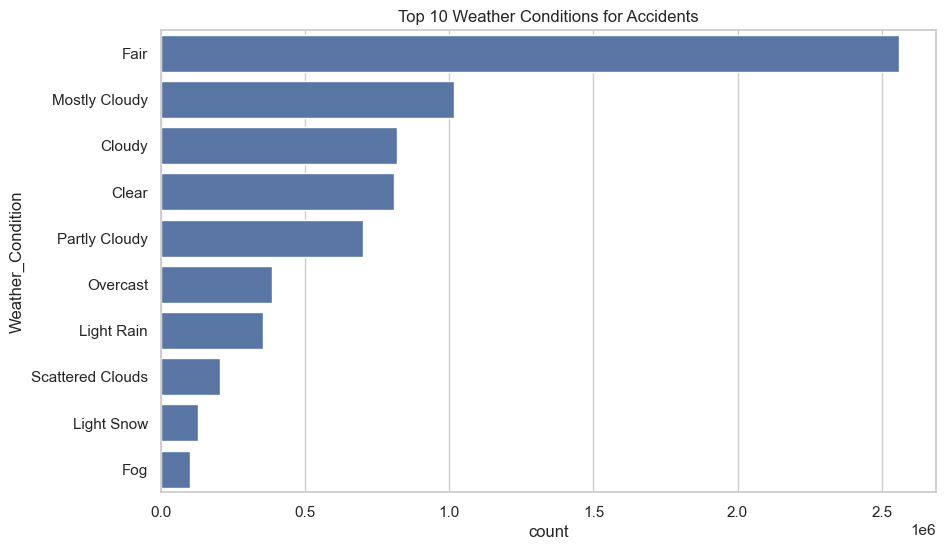

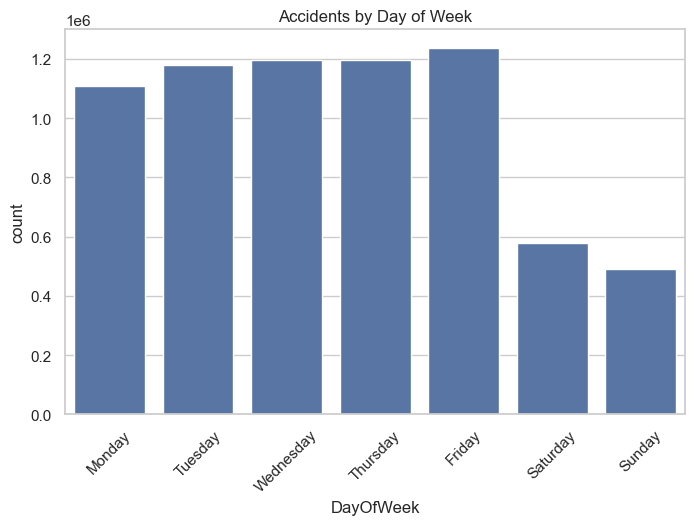

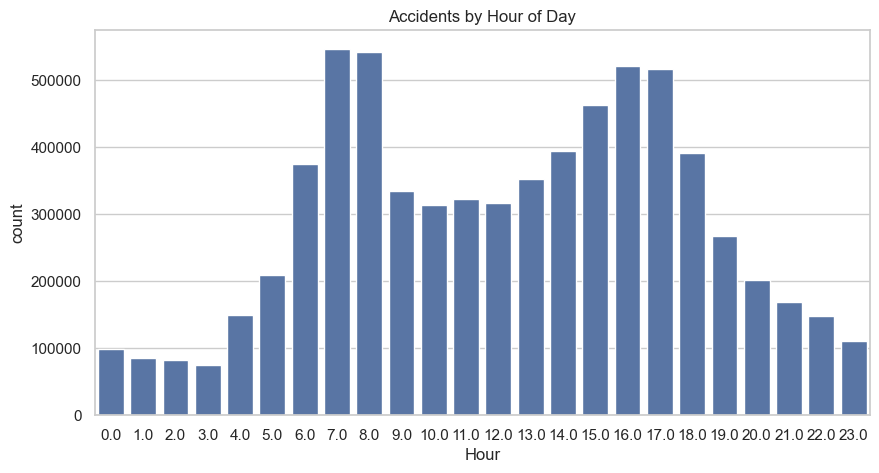

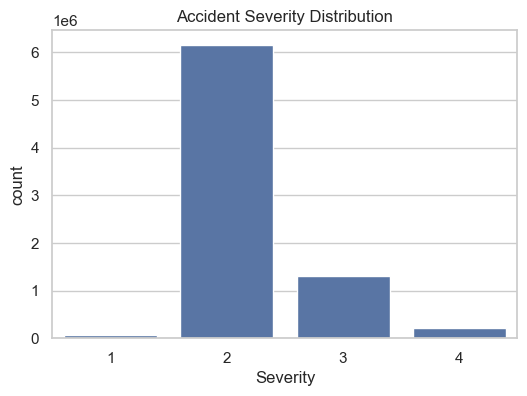

In [9]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 2. Load dataset
df = pd.read_csv("US_Accidents_March23.csv")

# 3. Convert Start_Time to datetime
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")

# Extract useful time features
df["Hour"] = df["Start_Time"].dt.hour
df["DayOfWeek"] = df["Start_Time"].dt.day_name()

# 4. Accidents by Weather Condition
plt.figure(figsize=(10,6))
sns.countplot(y=df["Weather_Condition"], order=df["Weather_Condition"].value_counts().iloc[:10].index)
plt.title("Top 10 Weather Conditions for Accidents")
plt.show()

# 5. Accidents by Day of Week
plt.figure(figsize=(8,5))
sns.countplot(x="DayOfWeek", data=df, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Accidents by Day of Week")
plt.xticks(rotation=45)
plt.show()

# 6. Accidents by Hour of Day
plt.figure(figsize=(10,5))
sns.countplot(x="Hour", data=df, order=sorted(df["Hour"].dropna().unique()))
plt.title("Accidents by Hour of Day")
plt.show()

# 7. Accident Severity Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Severity", data=df)
plt.title("Accident Severity Distribution")
plt.show()


In [16]:
import folium
from folium.plugins import HeatMap

df_sample = df[['Start_Lat', 'Start_Lng']].dropna().sample(50000, random_state=42)

m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

HeatMap(data=df_sample[['Start_Lat', 'Start_Lng']].values, radius=7, blur=4).add_to(m)

m.save("US_Accidents_March23.html")


